# **Class 6: Part 1 - PyTorch Advanced**

## Understanding `torch.nn.Module`

The `torch.nn.Module` class is a fundamental building block in PyTorch's neural network library. It provides a framework to create, organize, and manage neural network layers, enabling developers to define custom architectures with ease. Mastering `nn.Module` is crucial for building and customizing neural networks in PyTorch.



### What is `torch.nn.Module`?

`torch.nn.Module` serves as the base class for all neural network modules in PyTorch. It acts as a container for various layers and operations, offering essential functionalities such as parameter management, device assignment (e.g., GPU/CPU), and model persistence (saving/loading).



### Purpose of `nn.Module`

- **Encapsulation**: Encapsulates network layers and their associated behaviors within a reusable, organized class structure.
- **Parameter Management**: Automatically registers and manages parameters (e.g., weights and biases) for each layer in the module.
- **Forward Propagation**: Defines the computation that occurs during the forward pass through the network.
- **Utility Functions**: Provides helpful methods such as `cuda()` and `cpu()` for device handling and `state_dict()` and `load_state_dict()` for serialization and deserialization of model parameters.


## Core Methods of `torch.nn.Module`

### `__init__()`
The constructor method where you define and initialize your layers and other components of the model.


In [ ]:
import torch.nn as nn
import torch

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # Define a single linear layer (Logistic Regression)
        self.linear = nn.Linear(input_dim, 1)  # Single output for binary classification


### `forward(input)`

Defines the logic for the forward pass, specifying how input data flows through layers to produce the output.

In [ ]:
import torch.nn as nn

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # Define a single linear layer (Logistic Regression)
        self.linear = nn.Linear(input_dim, 1)  # Single output for binary classification

    def forward(self, x):
        # Forward pass: apply the linear layer and sigmoid activation
        return torch.sigmoid(self.linear(x))

### `parameters()`
Returns an iterator over the module’s parameters (e.g., weights and biases). Typically used when passing model parameters to optimizers.

In [ ]:
model = LogisticRegressionModel(100)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### `named_parameters()`
Similar to `parameters()`, but returns a generator that yields both the name and the parameter tensor. Useful for inspecting or differentiating between layers based on their names.

In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name}, Param: {param.shape}")

Layer: linear.weight, Param: torch.Size([1, 100])
Layer: linear.bias, Param: torch.Size([1])


### `state_dict()`

Returns a dictionary containing the state of the module, including model parameters and persistent buffers (e.g., running averages for batch normalization). Used to save the model’s parameters.

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0916,  0.0116, -0.0185, -0.0229,  0.0479,  0.0824,  0.0857, -0.0075,
                       -0.0445, -0.0037, -0.0731, -0.0122, -0.0020, -0.0618, -0.0592, -0.0092,
                        0.0146,  0.0962,  0.0226, -0.0457, -0.0551, -0.0233,  0.0606,  0.0255,
                       -0.0077,  0.0938,  0.0404, -0.0270,  0.0744, -0.0683, -0.0802, -0.0156,
                       -0.0524,  0.0522, -0.0238,  0.0802, -0.0674,  0.0352, -0.0629, -0.0868,
                       -0.0851,  0.0285, -0.0553, -0.0665,  0.0292,  0.0521, -0.0057,  0.0903,
                       -0.0843, -0.0213,  0.0745, -0.0340, -0.0071,  0.0279,  0.0660, -0.0861,
                        0.0325,  0.0137, -0.0532,  0.0524, -0.0857,  0.0874,  0.0745,  0.0676,
                       -0.0325, -0.0983, -0.0157, -0.0878, -0.0599,  0.0261,  0.0949,  0.0708,
                        0.0177, -0.0076, -0.0730, -0.0954, -0.0166,  0.0841, -0.0173, -0.0116,
                   

In [ ]:
torch.save(model.state_dict(), "model.pth")  # Save model state

### `load_state_dict(state_dict)`

Loads the model parameters from a dictionary (typically obtained from `state_dict()`). This is used to restore a model from a saved state.

In [ ]:
model.load_state_dict(torch.load("model.pth"))  # Load saved state

<ipython-input-7-4bb81aeb3c17>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))  # Load saved state


<All keys matched successfully>

### `train(mode=True)`

Sets the module in training mode, affecting certain layers like Dropout and BatchNorm which behave differently during training and evaluation. By default,`mode=True` sets the module to training mode. Pass `mode=False` to set it to evaluation mode.

In [ ]:
model.train()  # Set model to training mode

LogisticRegressionModel(
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

### `eval()`

A shorthand for `train(False)`, setting the module in evaluation mode. This is crucial for ensuring the correct behavior of certain layers, such as disabling dropout and using running averages for batch normalization.

In [ ]:
model.eval()  # Set model to evaluation mode

LogisticRegressionModel(
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

### `to(device)`

Moves the module and its parameters to a specified device (e.g., CPU or GPU). This is important for using GPUs to accelerate computations.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move model to GPU if available

LogisticRegressionModel(
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

## How it Works

When you create a custom network by inheriting from nn.Module, you define the layers in the`__init__` method and implement the forward pass logic in the forward method. The forward method is automatically called when the module is used as a function, facilitating easy integration of custom networks into PyTorch workflows.

By using these core methods and utilities, you can build sophisticated neural network architectures, manage model parameters efficiently, and deploy models on different devices seamlessly.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Create synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, random_state=42)
X = StandardScaler().fit_transform(X)  # Normalize features
y = y.reshape(-1, 1)  # Reshape to be a column vector

# Split data into train, dev (validation), and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 15% dev and 15% test

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_dev_tensor = torch.tensor(X_dev, dtype=torch.float32)
y_dev_tensor = torch.tensor(y_dev, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
# Instantiate the model
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
torch.manual_seed(42)
num_epochs = 10000
train_losses = []
dev_losses = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Clear the gradients

    # Forward pass for training data
    y_train_pred = model(X_train_tensor)
    train_loss = criterion(y_train_pred, y_train_tensor)

    # Backward pass and optimization
    train_loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Save training loss
    train_losses.append(train_loss.item())

    # Validation Phase (Dev set)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for evaluation
        y_dev_pred = model(X_dev_tensor)
        dev_loss = criterion(y_dev_pred, y_dev_tensor)

    # Save validation loss
    dev_losses.append(dev_loss.item())

    # Print loss for training and validation at the end of each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_loss.item():.4f}, '
          f'Dev Loss: {dev_loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [5001/10000], Train Loss: 0.4247, Dev Loss: 0.4134
Epoch [5002/10000], Train Loss: 0.4246, Dev Loss: 0.4134
Epoch [5003/10000], Train Loss: 0.4246, Dev Loss: 0.4134
Epoch [5004/10000], Train Loss: 0.4246, Dev Loss: 0.4134
Epoch [5005/10000], Train Loss: 0.4246, Dev Loss: 0.4134
Epoch [5006/10000], Train Loss: 0.4246, Dev Loss: 0.4133
Epoch [5007/10000], Train Loss: 0.4246, Dev Loss: 0.4133
Epoch [5008/10000], Train Loss: 0.4246, Dev Loss: 0.4133
Epoch [5009/10000], Train Loss: 0.4245, Dev Loss: 0.4133
Epoch [5010/10000], Train Loss: 0.4245, Dev Loss: 0.4133
Epoch [5011/10000], Train Loss: 0.4245, Dev Loss: 0.4132
Epoch [5012/10000], Train Loss: 0.4245, Dev Loss: 0.4132
Epoch [5013/10000], Train Loss: 0.4245, Dev Loss: 0.4132
Epoch [5014/10000], Train Loss: 0.4245, Dev Loss: 0.4132
Epoch [5015/10000], Train Loss: 0.4245, Dev Loss: 0.4132
Epoch [5016/10000], Train Loss: 0.4244, Dev Loss: 0.4131
Epoch [5017/10000], Train Los

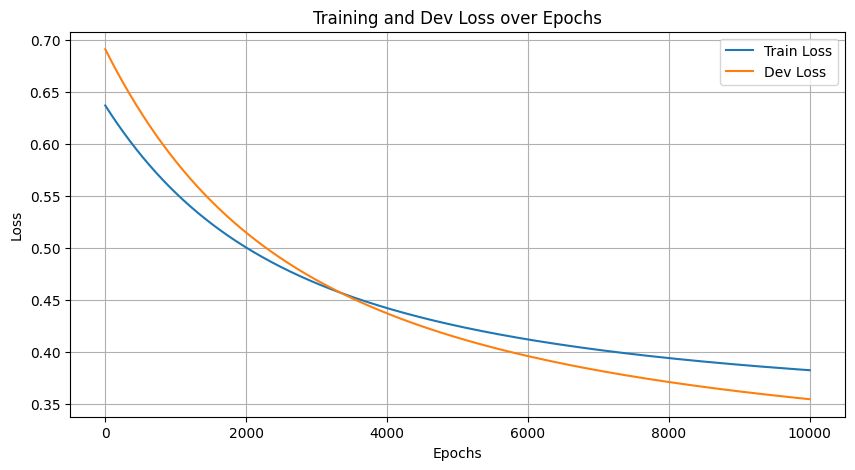

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), dev_losses, label='Dev Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Dev Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Final Test Set Evaluation
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for final evaluation
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred >= 0.5).float()  # Apply threshold
    test_loss = criterion(y_test_pred, y_test_tensor).item()
    accuracy = (y_test_pred_class.eq(y_test_tensor).sum() / y_test_tensor.shape[0]).item()
    print(f'\nFinal Test Loss: {test_loss:.4f}')
    print(f'Final Accuracy on Test Set: {accuracy:.4f}')



Final Test Loss: 0.3518
Final Accuracy on Test Set: 0.8733


## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>



Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

## Building a multi-class PyTorch model

A **binary classification** problem deals with classifying something as one of two options (e.g. a photo as a cat photo or a dog photo) where as a **multi-class classification** problem deals with classifying something from a list of *more than* two options (e.g. classifying a photo as a cat a dog or a chicken).

![binary vs multi-class classification image with the example of dog vs cat for binary classification and dog vs cat vs chicken for multi-class classification](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)
*Example of binary vs. multi-class classification. Binary deals with two classes (one thing or another), where as multi-class classification can deal with any number of classes over two, for example, the popular [ImageNet-1k dataset](https://www.image-net.org/) is used as a computer vision benchmark and has 1000 classes.*


### Creating multi-class classification data

To begin a multi-class classification problem, let's create some multi-class data.

To do so, we can leverage Scikit-Learn's [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method.

This method will create however many classes (using the `centers` parameter) we want.

Specifically, let's do the following:

1. Create some multi-class data with `make_blobs()`.
2. Turn the data into tensors (the default of `make_blobs()` is to use NumPy arrays).
3. Split the data into training and evaluation sets using `train_test_split()`.
4. Visualize the data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


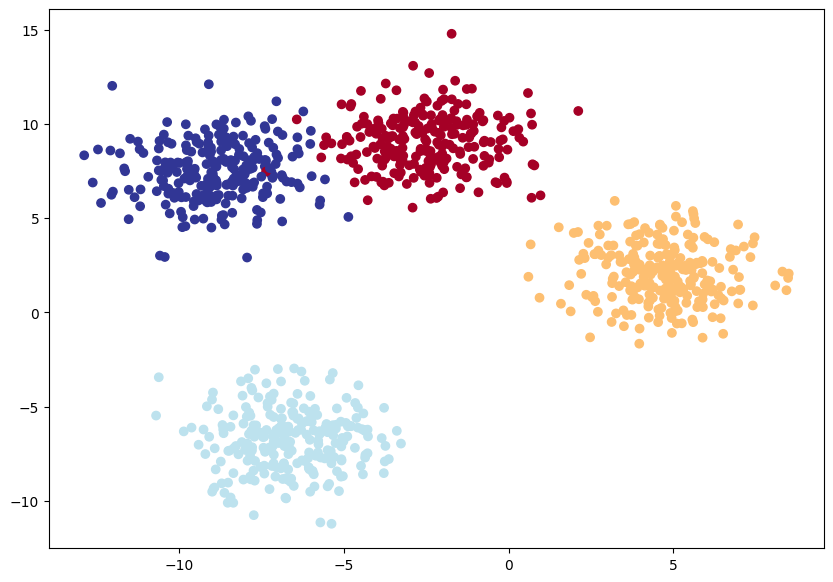

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_eval, y_blob_train, y_blob_eval = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

**Question:** Does this dataset need non-linearity? Or could you draw a succession of straight lines to separate it?

### Building a multi-class classification model in PyTorch

Let's create a subclass of `nn.Module` that takes in three hyperparameters:
* `input_features` - the number of `X` features coming into the model.
* `output_features` - the ideal numbers of output features we'd like (this will be equivalent to `NUM_CLASSES` or the number of classes in your multi-class classification problem).
* `hidden_units` - the number of hidden neurons we'd like each hidden layer to use.

Since we're putting things together, let's setup some device agnostic code (we don't have to do this again in the same notebook, it's only a reminder).

Then we'll create the model class using the hyperparameters above.

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

# Build model
class MultiClassModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [ ]:
model = MultiClassModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)

In [ ]:
model

MultiClassModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Creating a loss function and optimizer for a multi-class PyTorch model

Since we're working on a multi-class classification problem, we'll use the `nn.CrossEntropyLoss()` method as our loss function.

And we'll stick with using SGD with a learning rate of 0.1 for optimizing our `model` parameters.


In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

### Getting prediction probabilities for a multi-class PyTorch model

We've got a loss function and optimizer ready, and we're ready to train our model but before we do let's do a single forward pass with our model to see if it works.

In [ ]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

It looks like we get one value per feature of each sample.

Let's check the shape to confirm.

In [ ]:
# How many elements in a single prediction sample?
model(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

Our model is predicting one value for each class that we have.

Do you remember what the raw outputs of our model are called?

If you guessed **logits**, you'd be correct.


So right now our model is outputing logits but what if we wanted to figure out exactly which label is was giving the sample?

As in, how do we go from `logits -> prediction probabilities -> prediction labels` just like we did with the binary classification problem?

That's where the [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) comes into play.

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

If this doesn't make sense, let's see in code.

In [ ]:
# Make prediction logits with model
y_logits = model(X_blob_eval.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

In [ ]:
print(y_logits[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)


In [ ]:
print(y_pred_probs[:5])

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)


It may still look like the outputs of the softmax function are jumbled numbers but there's a very specific thing different about each sample.

After passing the logits through the softmax function, each individual sample now adds to 1 (or very close to).

In [ ]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

These prediction probabilities are essentially saying how much the model *thinks* the target `X` sample (the input) maps to each class.

Since there's one value for each class in `y_pred_probs`, the index of the *highest* value is the class the model thinks the specific data sample *most* belongs to.

We can check which index has the highest value using `torch.argmax()`.

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], grad_fn=<SelectBackward0>)
tensor(3)


You can see the output of `torch.argmax()` returns 3, so for the features (`X`) of the sample at index 0, the model is predicting that the most likely class value (`y`) is 3.

**Summary:**
>
- To summarize the above, a model's raw output is referred to as **logits**.
>
- For a multi-class classification problem, to turn the logits into **prediction probabilities**, you use the softmax activation function (`torch.softmax`).
>
- The index of the value with the highest **prediction probability** is the class number the model thinks is *most* likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

### Creating a training and evaluation loop for a multi-class PyTorch model


In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_eval, y_blob_eval = X_blob_eval.to(device), y_blob_eval.to(device)

for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Evaluation
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      eval_logits = model(X_blob_eval)
      eval_pred = torch.softmax(eval_logits, dim=1).argmax(dim=1)
      # 2. Calculate evaluation loss and accuracy
      eval_loss = loss_fn(eval_logits, y_blob_eval)
      eval_acc = accuracy_fn(y_true=y_blob_eval,
                             y_pred=eval_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Eval Loss: {eval_loss:.5f}, Eval Acc: {eval_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Eval Loss: 0.57861, Eval Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Eval Loss: 0.13037, Eval Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Eval Loss: 0.07216, Eval Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Eval Loss: 0.05133, Eval Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Eval Loss: 0.04098, Eval Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Eval Loss: 0.03486, Eval Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Eval Loss: 0.03083, Eval Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Eval Loss: 0.02799, Eval Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Eval Loss: 0.02587, Eval Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Eval Loss: 0.02423, Eval Acc: 99.50%


### Making and evaluating predictions with a PyTorch multi-class model

Let's make some predictions and visualize them.

In [ ]:
# Make predictions
model.eval()
with torch.inference_mode():
    y_logits = model(X_blob_eval)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

Alright, looks like our model's predictions are still in logit form.

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_eval[:10]}")
print(f"Eval accuracy: {accuracy_fn(y_true=y_blob_eval, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Eval accuracy: 99.5%


Let's visualize them with `plot_decision_boundary()`, remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (`plot_decision_boundary()` does this automatically for us).

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

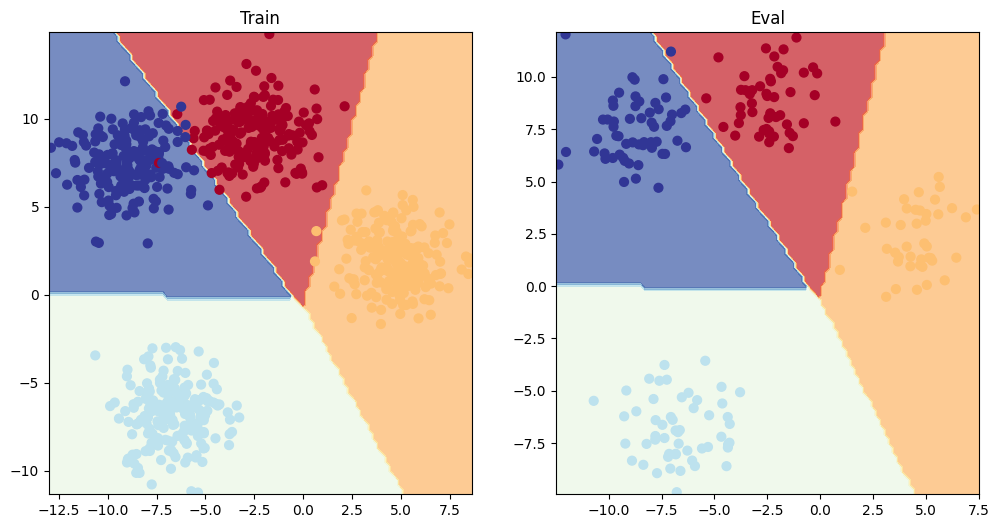

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Eval")
plot_decision_boundary(model, X_blob_eval, y_blob_eval)

## Improving our Pipeline

### Custom Datasets

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train, dev, test sets
X_blob_train, X_blob_eval, y_blob_train, y_blob_eval = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

X_blob_dev, X_blob_test, y_blob_dev, y_blob_test = train_test_split(X_blob_eval,
    y_blob_eval,
    test_size=0.5,
    random_state=RANDOM_SEED
)

In [ ]:
# Create a custom Dataset
class BlobDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        "Returns the total number of samples."
        return len(self.X)

    def __getitem__(self, idx):
        "Returns one sample of data, data and label (X, y)."
        return self.X[idx], self.y[idx]

# Create Dataset objects for training, validation and test sets
train_dataset = BlobDataset(X_blob_train, y_blob_train)
dev_dataset = BlobDataset(X_blob_dev, y_blob_dev)
test_dataset = BlobDataset(X_blob_test, y_blob_test)

In [ ]:
len(test_dataset)

100

### Custom Dataloaders

In [ ]:
# Create DataLoader objects
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
eval_loader = DataLoader(dataset=dev_dataset, batch_size=16, shuffle=False)
test_loader= DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

### Modularization

In [ ]:
# Function to create data
def create_data(data_config):
    X_blob, y_blob = make_blobs(
        n_samples=data_config["num_samples"],
        n_features=data_config["num_features"],
        centers=data_config["num_classes"],
        cluster_std=data_config["cluster_std"],
        random_state=data_config["random_seed"]
    )
    X_blob = torch.from_numpy(X_blob).type(torch.float)
    y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
    return X_blob, y_blob

# Function to split the data into train, dev, and test sets
def split_data(X, y, data_config):
    X_train, X_eval, y_train, y_eval = train_test_split(
        X, y, test_size=data_config["train_split"], random_state=data_config["random_seed"]
    )
    X_dev, X_test, y_dev, y_test = train_test_split(
        X_eval, y_eval, test_size=data_config["dev_split"], random_state=data_config["random_seed"]
    )
    return (X_train, y_train), (X_dev, y_dev), (X_test, y_test)

def create_dataloaders(data, batch_size, shuffle):
    dataset = BlobDataset(data[0], data[1])
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader

In [ ]:
# Training loop with evaluation at the end of each epoch
def train_and_evaluate(model, wandb, train_loader, train_data, dev_loader, dev_data, loss_fn, optimizer, training_config):
    epochs = training_config["epochs"]
    total_training_steps = len(train_loader) * epochs
    training_steps = 0
    total_evaluation_steps = len(dev_loader) * epochs
    evaluation_steps = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        # Training step
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Optimizer zero grad
            optimizer.zero_grad()

            # Forward pass
            y_logits = model(X_batch) # model outputs raw logits

            # Calculate loss
            loss = loss_fn(y_logits, y_batch)

            # Loss backwards
            loss.backward()

            # Optimizer step
            optimizer.step()

            # Update training epoch loss
            total_loss += loss.item()

            wandb.log({"training_step": training_steps, "train_loss_step": loss.item()})

            # Update training steps
            training_steps += 1

        # Calculate log epoch-level loss
        train_loss = total_loss / len(train_loader)

        # Calculate log epoch-level accuracy
        model.eval()
        with torch.no_grad():
            y_logits = model(train_data[0]) # model outputs raw logits
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
            train_acc = accuracy_fn(y_true=train_data[1],
                          y_pred=y_pred)

        wandb.log({"epoch": epoch, "train_loss": train_loss, "train_accuracy": train_acc})

        # Evaluation step
        model.eval()
        total_dev_loss = 0

        with torch.no_grad():
            for X_batch, y_batch in dev_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                # Forward pass
                y_logits = model(X_batch) # model outputs raw logits

                # Calculate loss
                loss = loss_fn(y_logits, y_batch)

                # Update evalution epoch loss
                total_dev_loss += loss.item()

                wandb.log({"evaluation_step": evaluation_steps, "eval_loss_step": loss.item()})

                # Update evaluation steps
                evaluation_steps += 1

        # Calculate log epoch-level loss
        dev_loss = total_dev_loss / len(dev_loader)

        # Calculate log epoch-level accuracy
        model.eval()
        with torch.no_grad():
            y_logits = model(dev_data[0]) # model outputs raw logits
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
            eval_acc = accuracy_fn(y_true=dev_data[1],
                          y_pred=y_pred)


        wandb.log({"epoch": epoch, "eval_loss": dev_loss, "eval_accuracy": eval_acc})

        # Save checkpoint every epoch (you can save based on conditions like improved accuracy)
        checkpoint_path = f'checkpoint_epoch_{epoch}.pt'
        save_checkpoint(epoch, wandb, model, optimizer, checkpoint_path)


In [ ]:
# Test evaluation function
def evaluate_test_set(model, wandb, test_data):

    ### Evaluation
    model.eval()
    with torch.inference_mode():
        y_logits = model(test_data[0]) # model outputs raw logits
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
        test_acc = accuracy_fn(y_true=test_data[1],
                  y_pred=y_pred)

    wandb.log({"test_accuracy": test_acc})

### Checkpoiting

In [ ]:
# Function to save checkpoints
def save_checkpoint(epoch, wandb, model, optimizer, checkpoint_path):
    # Save model, optimizer, and other states
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint, checkpoint_path)

    # Log checkpoint to Weights & Biases as an artifact
    wandb.save(checkpoint_path)
    artifact = wandb.Artifact(f'model-checkpoint-epoch-{epoch}', type='model')
    artifact.add_file(checkpoint_path)
    wandb.log_artifact(artifact)

### Experiment Tracking

In [ ]:
!pip install wandb

In [ ]:
# Define all configurations
data_config = {
    "num_samples": 1000,
    "num_classes": 4,
    "num_features": 2,
    "random_seed": 42,
    "cluster_std": 1.5,
    "train_split": 0.2,
    "dev_split": 0.5
}

model_config = {
    "hidden_units": 8,
    "input_features": data_config["num_features"],
    "output_features": data_config["num_classes"]
}

loss_config = {"loss_fn": nn.CrossEntropyLoss()}

optimizer_config = {
    "lr": 0.1,
    "optimizer": 'SGD'
}

training_config = {
    "epochs": 10,
    "train_batch_size": 32,
    "train_shuffle": False,
    "dev_batch_size": 16,
    "dev_shuffle": False
}

test_config = {
    "test_batch_size": 32,
    "test_shuffle": False
}

config = {'data_config': data_config, 'model_config': model_config, 'optimizer_config': optimizer_config,\
          'loss_config': loss_config, 'training_config': training_config, 'test_config': test_config}

In [ ]:
config

{'data_config': {'num_samples': 1000,
  'num_classes': 4,
  'num_features': 2,
  'random_seed': 42,
  'cluster_std': 1.5,
  'train_split': 0.2,
  'dev_split': 0.5},
 'model_config': {'hidden_units': 8,
  'input_features': 2,
  'output_features': 4},
 'optimizer_config': {'lr': 0.1, 'optimizer': 'SGD'},
 'loss_config': {'loss_fn': CrossEntropyLoss()},
 'training_config': {'epochs': 10,
  'train_batch_size': 32,
  'train_shuffle': False,
  'dev_batch_size': 16,
  'dev_shuffle': False},
 'test_config': {'test_batch_size': 32, 'test_shuffle': False}}

In [ ]:
# Create data
X_blob, y_blob = create_data(data_config)

# Split data into train, dev, test sets
train_data, dev_data, test_data = split_data(X_blob, y_blob, data_config)

# Create DataLoaders
train_loader = create_dataloaders(train_data, training_config['train_batch_size'], training_config['train_shuffle'])
dev_loader = create_dataloaders(dev_data, training_config['dev_batch_size'], training_config['dev_shuffle'])
test_loader = create_dataloaders(test_data, test_config['test_batch_size'], test_config['test_shuffle'])

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiClassModel(**model_config).to(device)
loss_fn = loss_config["loss_fn"]
optimizer = torch.optim.SGD(model.parameters(), lr=optimizer_config["lr"])

In [ ]:
import wandb

# Initialize W&B
wandb.init(project="blob-project", config=config)

# Run training and evaluation
train_and_evaluate(model, wandb, train_loader, train_data, dev_loader, dev_data, loss_fn, optimizer, training_config)
test_accuracy = evaluate_test_set(model, wandb, test_data)

# Finish W&B logging
wandb.finish()

Predicting on your own custom data with a trained model is possible, as long as you format the data into a similar format to what the model was trained on. Make sure you take care of the three big PyTorch and deep learning errors:

- Wrong datatypes - Your model expected torch.float32 when your data is torch.uint8.
- Wrong data shapes - Your model expected [batch_size, color_channels, height, width] when your data is [color_channels, height, width].
- Wrong devices - Your model is on the GPU but your data is on the CPU.
